<a href="https://colab.research.google.com/github/HebaRouk/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Copy_of_Heba_Rouk_Project_Machine_Translationfinal_project_7__(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
# Install libraries
!pip install Flask gunicorn tensorflow gradio

# Build Docker image (make sure your Dockerfile, app.py, and requirements.txt are in the correct location)
!docker build -t my-translation-app .

# (You would typically run the container outside of Colab)
# Example (if you have Docker Desktop installed on your local machine):
# !docker run -p 5000:5000 --name my-translation-app my-translation-app

# List containers (if needed)
!docker ps

# View logs (if needed)
# !docker logs -f my-translation-app

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
import pandas as pd
import os
from git import Repo  # To clone the repository

# Clone the GitHub repository
repo_url = "https://github.com/zaka-ai/machine_learning_certification.git"
repo_dir = "Challenge_7"  # Directory to clone the repository into

# Check if the directory exists before cloning
if not os.path.exists(repo_dir):
    print(f"Cloning repository from {repo_url} into {repo_dir}...")
    Repo.clone_from(repo_url, repo_dir)
else:
    print(f"Repository already exists in the directory: {repo_dir}")

# List files in the cloned repository
print("\nContents of the cloned repository:")
repo_contents = os.listdir(repo_dir)
print(repo_contents)

# Specify the CSV file path (update the file name if necessary)
csv_file_name = "Advertising.csv"  # Replace with the correct file name if needed
data_file_path = os.path.join(repo_dir, csv_file_name)

# Check if the file exists before attempting to load it
if os.path.exists(data_file_path):
    # Load the data
    data = pd.read_csv(data_file_path)
    print("\nDataset successfully loaded!")

    # Show the first few rows of the data
    print("\nFirst few rows of the dataset:")
    print(data.head())
else:
    print(f"\nError: The file '{csv_file_name}' was not found in the directory '{repo_dir}'. Please check the file name or path.")

Cloning repository from https://github.com/zaka-ai/machine_learning_certification.git into Challenge_7...

Contents of the cloned repository:
['flu.csv', 'Challenge 7', 'model-deployment-lab', 'store_data.csv', 'README.md', '.git', 'breast-cancer-wisconsin.csv', 'titanic.csv', 'Advertising.csv', 'hotel_bookings.csv']

Dataset successfully loaded!

First few rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [ ]:
!git clone https://github.com/zaka-ai/machine_learning_certification

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 20.37 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
%cd /content/machine_learning_certification/Challenge 7

/content/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
english = pd.read_csv('en.csv',header=None)
english.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
french=pd.read_csv('fr.csv',header=None)
french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
english = pd.read_csv('en.csv',header=None)
english.head()
french=pd.read_csv('fr.csv',header=None)
french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
print("We have {} english sentences and {} french sentences".format(len(english),len(french)))

We have 137860 english sentences and 137860 french sentences


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
df=pd.concat([english,french],axis=1)
df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
df.columns=['English','French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [ ]:
print("English",df['English'][2])
print("French",df['French'][2])

English california is usually quiet during march , and it is usually hot in june .
French california est généralement calme en mars , et il est généralement chaud en juin .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
import regex as re
def remove_punctuation(text ):
  return re.sub(r'[.!?;,]','',text)

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
df['English'] = df['English'].apply(lambda x: remove_punctuation(x))
df['French']=df['French'].apply(lambda x: remove_punctuation(x))

In [ ]:
print("English",df['English'][2])
print("French",df['French'][2])

English california is usually quiet during march  and it is usually hot in june 
French california est généralement calme en mars  et il est généralement chaud en juin 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
df['ENG Length']=df['English'].apply(lambda x: len(x.split()))
df.head()

,English,French,ENG Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l' automn...,13
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...,15
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et ...,14
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14


In [ ]:
df['FR Length']=df['French'].apply(lambda x: len(x.split()))
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l' automn...,13,14
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et ...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

<Axes: >

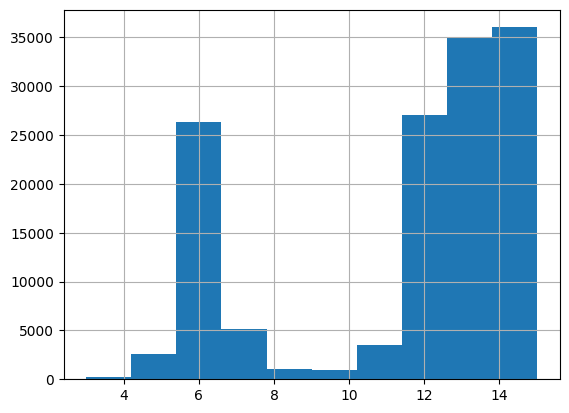

In [ ]:
df["ENG Length"].hist()

<Axes: >

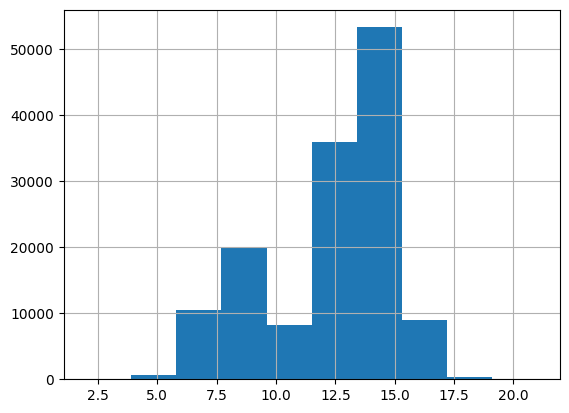

In [ ]:
df["FR Length"].hist()

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
max_eng=max(df['ENG Length'])
max_fr=max(df['FR Length'])
print("The maximum length of an english sentence is {} and the maximum length of a french sentence is {}".format(max_eng,max_fr))

The maximum length of an english sentence is 15 and the maximum length of a french sentence is 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

[Share Your Zaka]

Tokenize the sentences that we have.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

eng_tokenizer= Tokenizer()
eng_tokenizer.fit_on_texts(df['English'])
fr_tokenizer=Tokenizer()
fr_tokenizer.fit_on_texts(df['French'])
fr_tokenizer=fr_tokenizer.texts_to_sequences(df['French'])
eng_tokenizer=eng_tokenizer.texts_to_sequences(df['English'])

**How many unique words do we have in english and in french?**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizers
eng_tokenizer = Tokenizer()
fr_tokenizer = Tokenizer()

# Fit tokenizers on text data
eng_tokenizer.fit_on_texts(df['English'])
fr_tokenizer.fit_on_texts(df['French'])

# Get vocabulary sizes
eng_vocab_size = len(eng_tokenizer.word_index) + 1  # Adding 1 for padding/indexing
fr_vocab_size = len(fr_tokenizer.word_index) + 1

print(f"We have {eng_vocab_size} unique words in English and {fr_vocab_size} unique words in French.")

We have 200 unique words in English and 345 unique words in French.


####Padding

**What should be the length of the sequences that we have after padding?**

[Share your Zaka]

Perform padding on the sequences that we have.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Ensure text data is properly loaded
df['English'] = df['English'].astype(str)
df['French'] = df['French'].astype(str)

# Initialize tokenizers
eng_tokenizer = Tokenizer()
fr_tokenizer = Tokenizer()

# Fit tokenizers on text data
eng_tokenizer.fit_on_texts(df['English'].tolist())
fr_tokenizer.fit_on_texts(df['French'].tolist())

# Convert text to sequences
eng_tokenized = eng_tokenizer.texts_to_sequences(df['English'].tolist())
fr_tokenized = fr_tokenizer.texts_to_sequences(df['French'].tolist())

# Determine max sequence lengths
max_eng = max(len(seq) for seq in eng_tokenized)
max_fr = max(len(seq) for seq in fr_tokenized)

# Pad sequences
fr_tokenized_padded = pad_sequences(fr_tokenized, maxlen=max_fr, padding='post')
eng_tokenized_padded = pad_sequences(eng_tokenized, maxlen=max_eng, padding='post')

print("Padding completed successfully!")

Padding completed successfully!


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
from keras.layers import Dense, LSTM, GRU, Embedding, RepeatVector, TimeDistributed, Bidirectional
from keras.models import Sequential

# Define model
model = Sequential()

# Encoder: Embedding + Bidirectional GRU
model.add(Embedding(input_dim=eng_vocab_size + 1, output_dim=256))  # Removed input_length
model.add(Bidirectional(GRU(256, return_sequences=False)))  # return_sequences=False for encoder

# Repeat vector for decoder
model.add(RepeatVector(max_fr))

# Decoder: GRU + Dense output
model.add(GRU(256, return_sequences=True))
model.add(TimeDistributed(Dense(fr_vocab_size + 1, activation="softmax")))

# Build the model by specifying input shape
model.build(input_shape=(None, max_eng))  # Manually specify input shape

# Print summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 15, 256)             │          51,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 512)                 │         789,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 21, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 21, 256)             │         591,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 21, 346)             │          88,922 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,521,242 (5.80 MB)

 Trainable params: 1,521,242 (5.80 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=eng_tokenized_padded,y=fr_tokenized_padded,validation_split=0.2,epochs=5,batch_size=64)

Epoch 1/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 615s 352ms/step - accuracy: 0.5967 - loss: 1.7391 - val_accuracy: 0.8183 - val_loss: 0.6230
Epoch 2/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 625s 354ms/step - accuracy: 0.8553 - loss: 0.4989 - val_accuracy: 0.9315 - val_loss: 0.2486
Epoch 3/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 625s 356ms/step - accuracy: 0.9411 - loss: 0.2097 - val_accuracy: 0.9551 - val_loss: 0.1533
Epoch 4/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 611s 354ms/step - accuracy: 0.9596 - loss: 0.1378 - val_accuracy: 0.9585 - val_loss: 0.1392
Epoch 5/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 622s 354ms/step - accuracy: 0.9668 - loss: 0.1118 - val_accuracy: 0.9672 - val_loss: 0.1115


Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def translate_sentence(model, sentence, eng_tokenizer, fr_tokenizer, max_eng, max_fr):
    """
    Translates an English sentence into French using a trained model.

    Parameters:
    - model: The trained sequence-to-sequence model.
    - sentence: The input English sentence (string).
    - eng_tokenizer: Tokenizer for English words.
    - fr_tokenizer: Tokenizer for French words.
    - max_eng: Maximum input sequence length.
    - max_fr: Maximum output sequence length.

    Returns:
    - Translated French sentence (string).
    """
    # Tokenize and pad the input sentence
    sequence = eng_tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_eng, padding="post")

    # Predict the output sequence
    prediction = model.predict(padded_sequence)

    # Convert the predicted token indices to words
    predicted_indices = np.argmax(prediction, axis=-1)[0]  # Take the first sample

    # Convert indices to words
    index_to_word = {index: word for word, index in fr_tokenizer.word_index.items()}
    translated_words = [index_to_word.get(idx, "") for idx in predicted_indices if idx > 0]

    return " ".join(translated_words)

# Example usage:
# translated_text = translate_sentence(model_new, "hello how are you", eng_tokenizer, fr_tokenizer, max_eng, max_fr)
# print(translated_text)




In [ ]:
def final_predictions_modeli(sentence):
   y_id_to_word={value:key for key,value in fr_tokenizer.word_index.items()}
   y_id_to_word[0]='<PAD>'
   sentence=eng_tokenizer.texts_to_sequences([sentence])
   sentence=pad_sequences(sentence,maxlen=max_eng,padding='post')
   prediction=model.predict(sentence,len(sentence))

   print(''.join([y_id_to_word[np.argmax(x)] for x in prediction[0]]))

In [ ]:
import pickle
import tensorflow as tf
import os

def save_model_artifacts(model, eng_tokenizer, fr_tokenizer, max_eng, max_fr, base_path='.'):
    """
    Save all necessary model artifacts:
    - Model weights
    - Tokenizers
    - Configuration parameters

    Args:
        model: Trained Keras model
        eng_tokenizer: Fitted English tokenizer
        fr_tokenizer: Fitted French tokenizer
        max_eng: Maximum English sequence length
        max_fr: Maximum French sequence length
        base_path: Directory to save files
    """
    # Create directory if it doesn't exist
    os.makedirs(base_path, exist_ok=True)

    # 1. Save the model
    model_path = os.path.join(base_path, 'translation_model.h5')
    model.save(model_path)
    print(f"Model saved to {model_path}")

    # 2. Save the English tokenizer
    eng_tokenizer_path = os.path.join(base_path, 'english_tokenizer.pkl')
    with open(eng_tokenizer_path, 'wb') as f:
        pickle.dump(eng_tokenizer, f)
    print(f"English tokenizer saved to {eng_tokenizer_path}")

    # 3. Save the French tokenizer
    fr_tokenizer_path = os.path.join(base_path, 'french_tokenizer.pkl')
    with open(fr_tokenizer_path, 'wb') as f:
        pickle.dump(fr_tokenizer, f)
    print(f"French tokenizer saved to {fr_tokenizer_path}")

    # 4. Save configuration parameters
    config = {
        'max_eng_length': max_eng,
        'max_fr_length': max_fr,
        'eng_vocab_size': len(eng_tokenizer.word_index) + 1,
        'fr_vocab_size': len(fr_tokenizer.word_index) + 1
    }

    config_path = os.path.join(base_path, 'model_config.pkl')
    with open(config_path, 'wb') as f:
        pickle.dump(config, f)
    print(f"Model configuration saved to {config_path}")

def load_model_artifacts(base_path='.'):
    """
    Load all saved model artifacts.

    Args:
        base_path: Directory containing saved files

    Returns:
        tuple: (model, eng_tokenizer, fr_tokenizer, config)
    """
    # 1. Load the model
    model_path = os.path.join(base_path, 'translation_model.h5')
    model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")

    # 2. Load the English tokenizer
    eng_tokenizer_path = os.path.join(base_path, 'english_tokenizer.pkl')
    with open(eng_tokenizer_path, 'rb') as f:
        eng_tokenizer = pickle.load(f)
    print(f"English tokenizer loaded from {eng_tokenizer_path}")

    # 3. Load the French tokenizer
    fr_tokenizer_path = os.path.join(base_path, 'french_tokenizer.pkl')
    with open(fr_tokenizer_path, 'rb') as f:
        fr_tokenizer = pickle.load(f)
    print(f"French tokenizer loaded from {fr_tokenizer_path}")

    # 4. Load configuration parameters
    config_path = os.path.join(base_path, 'model_config.pkl')
    with open(config_path, 'rb') as f:
        config = pickle.load(f)
    print(f"Model configuration loaded from {config_path}")

    return model, eng_tokenizer, fr_tokenizer, config

# Usage example:
if __name__ == "__main__":
    # Save artifacts
    save_model_artifacts(model, eng_tokenizer, fr_tokenizer, max_eng, max_fr)

    # Optional: Verify loading
    loaded_model, loaded_eng_tokenizer, loaded_fr_tokenizer, loaded_config = load_model_artifacts()
    print("\nLoaded configuration:", loaded_config)

Model saved to ./translation_model.h5
English tokenizer saved to ./english_tokenizer.pkl
French tokenizer saved to ./french_tokenizer.pkl
Model configuration saved to ./model_config.pkl
Model loaded from ./translation_model.h5
English tokenizer loaded from ./english_tokenizer.pkl
French tokenizer loaded from ./french_tokenizer.pkl
Model configuration loaded from ./model_config.pkl

Loaded configuration: {'max_eng_length': 15, 'max_fr_length': 21, 'eng_vocab_size': 200, 'fr_vocab_size': 345}


In [ ]:
from google.colab import files
import os

def download_model_files():
    """
    Downloads all model-related files from Google Colab to your laptop.
    """
    # List of files to download
    files_to_download = [
        'translation_model.h5',
        'english_tokenizer.pkl',
        'french_tokenizer.pkl',
        'model_config.pkl'
    ]

    print("Starting downloads...")
    for file in files_to_download:
        if os.path.exists(file):
            files.download(file)
            print(f"Downloaded: {file}")
        else:
            print(f"Error: {file} not found")

    print("\nDownload complete! Check your downloads folder.")

# Run the download
download_model_files()

Starting downloads...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: translation_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: english_tokenizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: french_tokenizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: model_config.pkl

Download complete! Check your downloads folder.


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [ ]:
import os
print(os.path.exists(r'/content/translation_model (2).h5'))
print(os.path.exists(r'/content/model_config (2).pkl'))
print(os.path.exists(r'/content/english_tokenizer (2).pkl'))
print(os.path.exists(r'/content/french_tokenizer (2).pkl'))


True
True
True
True


compile and train your new model.

In [ ]:
import os
import json
from tensorflow.keras.preprocessing.text import Tokenizer

# Define folder path and ensure it exists
folder_path = r"C:\Users\HP\Desktop\Zaka\ML Model deploement"
os.makedirs(folder_path, exist_ok=True)  # Create directory if it doesn't exist

# Define full file paths
eng_tokenizer_path = os.path.join(folder_path, "eng_tokenizer.json")
fr_tokenizer_path = os.path.join(folder_path, "french_tokenizer.json")

# Sample data (replace with your actual dataset)
english_texts = ['Hello world', 'How are you?']
french_texts = ['Bonjour le monde', 'Comment ça va ?']

# Create and fit the English tokenizer
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(english_texts)

# Save the English tokenizer to a JSON file
with open(eng_tokenizer_path, 'w') as f:
    json.dump(eng_tokenizer.to_json(), f)

# Create and fit the French tokenizer
fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(french_texts)

# Save the French tokenizer to a JSON file
with open(fr_tokenizer_path, 'w') as f:
    json.dump(fr_tokenizer.to_json(), f)

# Verify if the tokenizer files were successfully created
print("English tokenizer exists:", os.path.exists(eng_tokenizer_path))
print("French tokenizer exists:", os.path.exists(fr_tokenizer_path))

# Optional: Print files in the directory for debugging
print("Files in directory:", os.listdir(folder_path))
print("English Tokenizer Path:", eng_tokenizer_path)
print("French Tokenizer Path:", fr_tokenizer_path)



English tokenizer exists: True
French tokenizer exists: True
Files in directory: ['french_tokenizer.json', 'eng_tokenizer.json']
English Tokenizer Path: C:\Users\HP\Desktop\Zaka\ML Model deploement/eng_tokenizer.json
French Tokenizer Path: C:\Users\HP\Desktop\Zaka\ML Model deploement/french_tokenizer.json


In [ ]:
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import os

import os
import json
from tensorflow.keras.preprocessing.text import Tokenizer

# Define paths
MODELS_DIR = "models"
TOKENIZERS_DIR = os.path.join(MODELS_DIR, "tokenizers")
ENG_TOKENIZER_PATH = os.path.join(TOKENIZERS_DIR, "eng_tokenizer.json")

# Create directories if they don't exist
if not os.path.exists(TOKENIZERS_DIR):
    os.makedirs(TOKENIZERS_DIR)

# Sample English texts
english_texts = ["This is a test.", "Another test sentence."]

# Create and fit the tokenizer
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(english_texts)

# Save the tokenizer
with open(ENG_TOKENIZER_PATH, 'w', encoding='utf-8') as f:
    json.dump(eng_tokenizer.to_json(), f)

print(f"Tokenizer saved to: {ENG_TOKENIZER_PATH}")


# Now, try to load it immediately after saving:
try:
    with open(ENG_TOKENIZER_PATH, 'r', encoding='utf-8') as f:
        loaded_tokenizer = tokenizer_from_json(json.load(f))
    print("Tokenizer loaded successfully!")
except FileNotFoundError:
    print(f"Error: Tokenizer not found at: {ENG_TOKENIZER_PATH}")

Tokenizer saved to: models/tokenizers/eng_tokenizer.json
Tokenizer loaded successfully!


In [ ]:
!docker exec -it <container_id> bash
!cd /app/models/tokenizers  # Or the path inside your container
!ls -l  # List the files

/bin/bash: line 1: container_id: No such file or directory
/bin/bash: line 1: cd: /app/models/tokenizers: No such file or directory
total 37432
drwxr-xr-x 2 root root     4096 Feb 19 04:34 'C:\Users\HP\Desktop\Zaka\ML Model deploement'
-rw-r--r-- 1 root root  9465321 Feb 19 03:31  en.csv
-rw-r--r-- 1 root root     6055 Feb 19 04:31  english_tokenizer.pkl
-rw-r--r-- 1 root root 10515807 Feb 19 03:31  fr.csv
-rw-r--r-- 1 root root    11462 Feb 19 04:31  french_tokenizer.pkl
-rw-r--r-- 1 root root       91 Feb 19 04:31  model_config.pkl
drwxr-xr-x 3 root root     4096 Feb 19 04:34  models
-rw-r--r-- 1 root root 18310952 Feb 19 04:31  translation_model.h5


Define a new function that relies on your new model to make predictions.

In [ ]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample English text (replace with your training data)
english_texts = [
    "This is the first English sentence.",
    "Another English sentence here.",
    "Tokenization is an important step."
]

# Create and fit the tokenizer
eng_tokenizer = Tokenizer(num_words=5000, oov_token="<UNK>") # Adjust num_words as needed
eng_tokenizer.fit_on_texts(english_texts)

# Save the tokenizer to JSON
eng_tokenizer_path = "C:\\models\\tokenizers\\eng_tokenizer.json"  # Use double backslashes or a raw string
with open(eng_tokenizer_path, "w", encoding="utf-8") as f:
    json.dump(eng_tokenizer.to_json(), f)

print(f"English Tokenizer saved to: {eng_tokenizer_path}")

English Tokenizer saved to: C:\models\tokenizers\eng_tokenizer.json


In [ ]:
dockerfile_content = """
# Use an official Python runtime as a parent image
FROM python:3.9-slim
# Set the working directory
WORKDIR /app
# Copy the requirements file
COPY requirements.txt .
# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt
# Copy the current directory contents into the container
COPY . .
# Expose the port the app runs on
EXPOSE 5000
# Run the Flask app
CMD ["python", "app.py"]
"""
# Save the Dockerfile content to a file
with open('/content/Dockerfile', 'w') as file:
    file.write(dockerfile_content)
# Verify by reading the file content
with open('/content/Dockerfile', 'r') as file:
    print(file.read())



# Use an official Python runtime as a parent image
FROM python:3.9-slim
# Set the working directory
WORKDIR /app
# Copy the requirements file
COPY requirements.txt .
# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt
# Copy the current directory contents into the container
COPY . .
# Expose the port the app runs on
EXPOSE 5000
# Run the Flask app
CMD ["python", "app.py"]



In [ ]:
# Install libraries
!pip install Flask gunicorn tensorflow gradio
# Build Docker image (make sure your Dockerfile, app.py, and requirements.txt are in the correct location)
!docker build -t my-translation-app .
%cd /content/my_translation_app # Replace /content/my_translation_app with the correct path
!docker build -t my-translation-app .
!docker save my-translation-app | gzip > my-translation-app.tar.gz
# (You would typically run the container outside of Colab)
# Example (if you have Docker Desktop installed on your local machine):
!docker run -p 5000:5000 --name my-translation-app my-translation-app
!pip freeze > requirements.txt
# List containers (if needed)
!docker ps

DEPRECATED: The legacy builder is deprecated and will be removed in a future release.
            Install the buildx component to build images with BuildKit:
            https://docs.docker.com/go/buildx/

unable to prepare context: unable to evaluate symlinks in Dockerfile path: lstat /content/machine_learning_certification/Challenge 7/Dockerfile: no such file or directory
[Errno 2] No such file or directory: '/content/my_translation_app # Replace /content/my_translation_app with the correct path'
/content/machine_learning_certification/Challenge 7
DEPRECATED: The legacy builder is deprecated and will be removed in a future release.
            Install the buildx component to build images with BuildKit:
            https://docs.docker.com/go/buildx/

unable to prepare context: unable to evaluate symlinks in Dockerfile path: lstat /content/machine_learning_certification/Challenge 7/Dockerfile: no such file or directory
Cannot connect to the Docker daemon at unix:///var/run/docker.sock.

In [1]:
import tensorflow as tf
import time
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. GPU Check (CRITICAL - Run this FIRST)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs found:")
    for gpu in gpus:
        print(gpu)
        tf.config.experimental.set_memory_growth(gpu, True)  # VERY IMPORTANT!
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
else:
    print("No GPUs found. Make sure you have a GPU runtime selected and restarted.")
    # If GPU is essential, uncomment the next line:
    # exit()  # Stop execution if no GPU is found.  Otherwise, the code will just run on CPU.

# 2. Load Tokenizers and Model (Adapt to YOUR setup)
try:
    # Example using Hugging Face Transformers (REPLACE with your actual model)
    from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM

    eng_tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
    fr_tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")  # Often the same for EN-FR
    model = TFAutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

    # If you have a different model loading method (e.g., from a saved file):
    # model = tf.keras.models.load_model("your_model_path")
    # ... (Any other model-specific setup)

    print("Model and tokenizers loaded successfully.")
except Exception as e:
    print(f"Error loading model or tokenizers: {e}")
    exit()  # Exit if model loading fails

# 3. Translation Function (Adapt to YOUR setup)
def translate(input_text):
    start_time = time.time()  # Measure preprocessing time

    # Preprocessing using Hugging Face tokenizer (example)
    inputs = eng_tokenizer(input_text, return_tensors="tf")
    input_ids = inputs.input_ids

    preprocessing_time = time.time() - start_time

    start_time = time.time()  # Measure inference time

    # Inference (example using model.generate - adjust for your model)
    generated_ids = model.generate(input_ids)
    translated_text = fr_tokenizer.decode(generated_ids[0], skip_special_tokens=True)

    inference_time = time.time() - start_time

    print(f"Preprocessing time: {preprocessing_time:.4f} seconds")  # Print times
    print(f"Inference time: {inference_time:.4f} seconds")  # Print times

    return translated_text

# 4. Gradio Interface
iface = gr.Interface(
    fn=translate,
    inputs=gr.Textbox(lines=2, placeholder="Enter text to translate..."),
    outputs="text",
    title="English-to-French Translator",
    description="A simple English-to-French translation demo.",
    examples=[
        ["Hello, how are you?"],
        ["This is a test sentence."],
        ["The quick brown fox jumps over the lazy dog."]
    ]
)

iface.launch()

ModuleNotFoundError: No module named 'gradio'

In [ ]:
from flask import Flask, render_template, request
# Import your model and preprocessing/postprocessing functions
# from your_model_file import translate_text, preprocess, postprocess

app = Flask(__name__)

@app.route("/", methods=["GET", "POST"])
def index():
    translated_text = ""
    if request.method == "POST":
        input_text = request.form["input_text"]
        # Preprocess input
        processed_text = preprocess(input_text)
        # Run model inference
        translated_output = translate_text(processed_text)  # Assuming you have this function
        # Postprocess output
        translated_text = postprocess(translated_output)
    return render_template("index.html", translated_text=translated_text)

if __name__ == "__main__":
    app.run(debug=True, host='0.0.0.0', port=5000) # host 0.0.0.0 makes the app accessible in docker

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

[Share Your Zaka]

**What are some additional ways that we can do to improve the performance of our model?**

[Share Your Zaka]